In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

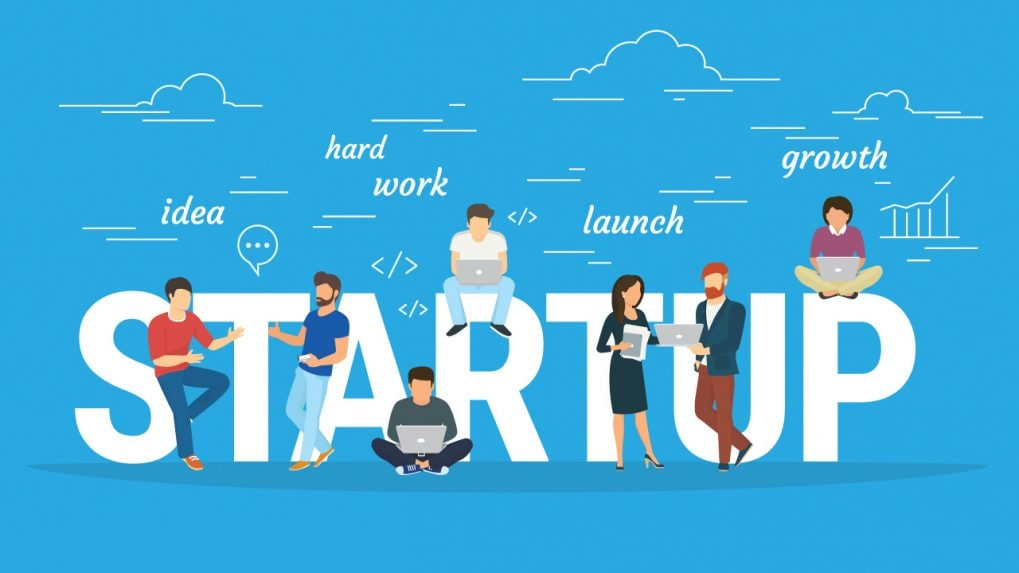

In [ ]:
data = pd.read_csv(r'../input/startup-investments-crunchbase/investments_VC.csv')

In [ ]:
#pd.set_option('display.max_columns', None)
data.head()

In [ ]:
data.isnull().sum()

In [ ]:
#We want to predict the status, any row without that data is useless and will be removed
data.dropna(subset=['status'], axis = 0, inplace = True)

In [ ]:
data.isnull().sum()

In [ ]:
# I believe the features founded_month founded_quarter and founded_year  are repeated and useless.
#We can just use founded_at
data.drop(['founded_month','founded_quarter','founded_year'],axis = 1,inplace = True)

In [ ]:
ac_data = data.loc[data['status'] == 'acquired']

In [ ]:
#I wish to pick the most common markets in this data, so this displays all the information without ...

#pd.set_option('display.max_rows', None)
ac_data[' market '].value_counts()

### We will select these markets and compare them with different features: 
Software                                  464 \
 Curated Web                               206\
 Enterprise Software                       200\
 Mobile                                    198\
 Biotechnology                             183\
 Advertising                               130\
 Games                                     107\
 E-Commerce                                 99\
 Semiconductors                             89\
 Security                                   88\
 Web Hosting                                85\
 Hardware + Software                        75\
 Health Care                                67\
 Social Media                               66\
 Finance                                    60\
 Analytics                                  55

In [ ]:
dict_of_markets = dict(ac_data[' market '].value_counts()[0:16])
dict_of_markets.keys()
list_of_markets  = list(dict_of_markets.keys())
list_of_markets

# Acquired Companies

### Insight: We see how much seed capital, acquired companies in those markets started with

In [ ]:

#My first 3 questions I wish to answer are
#How much seed did all the acquired companies start with
#How much seed did all the closed companies start with
#How much seed did all the operating companies start with
#The data which has acquired companies in the 16 most common markets
ac_markets_data  = ac_data.loc[ac_data[' market '].isin(list_of_markets)]

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#Set figure size to be 15x6 and cahnge styles
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.set_theme(style='whitegrid')

ax = sns.barplot(ac_markets_data[' market '], ac_markets_data['seed'] , ci = None)
#Make ticks more spread out and readable
#ax.set_xticks(np.arange(0, max(data['driver_age']), 3))

plt.xlabel('Market')
plt.xticks(rotation = 45)
plt.ylabel('Seed')

### Insight: We see how much venture capital, acquired companies in those markets started with

In [ ]:
#Which market is most famous in which country?
#Look at the relation between the market and counties
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#Set figure size to be 15x6 and cahnge styles
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.set_theme(style='whitegrid')

ax = sns.barplot(ac_markets_data[' market '], ac_markets_data['venture'], ci = None)

#sns.pointplot(x=" market ", y="country_code", data=ac_markets_data)
#Make ticks more spread out and readable
#ax.set_xticks(np.arange(0, max(data['driver_age']), 3))

plt.xlabel('Market')
plt.xticks(rotation = 45)
plt.ylabel('Venture')

# Operating companies

In [ ]:
op_data = data.loc[data['status'] == 'operating']
op_markets_data  = op_data.loc[op_data[' market '].isin(list_of_markets)]

plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.set_theme(style='whitegrid')

ax = sns.barplot(op_markets_data[' market '],op_markets_data['seed'] , ci = None)
#Make ticks more spread out and readable
#ax.set_xticks(np.arange(0, max(data['driver_age']), 3))

plt.xlabel('Market')
plt.xticks(rotation = 45)
plt.ylabel('Seed')

# Closed companies

In [ ]:
# Now do the same for closed 
closed_data = data.loc[data['status'] == 'closed']
closed_markets_data  = closed_data.loc[closed_data[' market '].isin(list_of_markets)]

plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.set_theme(style='whitegrid')

ax = sns.barplot(closed_markets_data[' market '], closed_markets_data['seed'], ci = None)
#Make ticks more spread out and readable
#ax.set_xticks(np.arange(0, max(data['driver_age']), 3))
plt.xticks(rotation = 45)
plt.xlabel('Seed')
plt.ylabel('Market')